In [1]:
# In this course, the SageMaker is pre-configured with MLflow integration.
# The MLflow server can be accessed via Python API or via the browser using the launch tab.
import mlflow

In [2]:
# MLFlow data model is fairly simple.
# An experiment is a set of runs that are related.
# A run has static params, time-variable metrics, and artifacts.

# In a typical ML workflow, an ML project is a single experiment.
# Within an experiment, each run corresponds to an ML model.
# A run's params are used to record hyperparams that distinguish different models.
# After each epoch, the model's metrics are logged to have a time series.

In [3]:
# The current experiment can be changed for the duration of the session.
# All runs in this notebook will be grouped under this experiment.
mlflow.set_experiment("my_project")

<Experiment: artifact_location='file:///app/mlflow/828221325841870602', creation_time=1694401973406, experiment_id='828221325841870602', last_update_time=1694401973406, lifecycle_stage='active', name='my_project', tags={}>

In [4]:
# Use start_run to start a run and end_run to end it.
# The run will stay active until explicitly ended.

# Simple example:
mlflow.start_run()

# ... train a model ...

# This is important.
mlflow.end_run()

In [5]:
# It's a lot more convenient to use a context manager to end the run.

with mlflow.start_run():
    # Params are various (hyper-)parameters of a model
    # that need to be recorded for analysis and reproduction.
    # These dimensions can be used later to aggregate results.
    mlflow.log_params({
        'learning_rate': 0.1, 
        'alpha': 1
    })
    
    # Metrics describe the performance of a model during
    # and after training. The same metric can be logged
    # multiple times -- typically after each epoch.
    for i in range(10):
        import random
        mlflow.log_metrics({
            'cross_entropy': random.uniform(-5, 5), 
            'mean_squared_error': random.uniform(0, 10),
        }, step=i)
        
    # Artifact is any file that needs to be saved.
    # Typically, these are learned model parameters
    # and other training artifacts that are need to load 
    # the model at a later time.
    # In this example, we are simply uploading this notebook.
    mlflow.log_artifact("MLFlow.ipynb")

In [6]:
# The runs from a particular experiment can be viewed as a data frame.
# In this data frame, the last reported metrics are shown.
runs_dataframe = mlflow.search_runs()
runs_dataframe.set_index('run_id').transpose()

run_id,f7639f92c4b74572979169e01ca0bc09,080623df455947ee8dd4fa9887a74ef1,97bd9087cddf4ea480da352c6a4f053f,8e006bba23db418fa97c1bc9e6efc735
experiment_id,828221325841870602,828221325841870602,828221325841870602,828221325841870602
status,FINISHED,FINISHED,FINISHED,FINISHED
artifact_uri,file:///app/mlflow/828221325841870602/f7639f92...,file:///app/mlflow/828221325841870602/080623df...,file:///app/mlflow/828221325841870602/97bd9087...,file:///app/mlflow/828221325841870602/8e006bba...
start_time,2023-09-11 03:20:12.908000+00:00,2023-09-11 03:20:12.897000+00:00,2023-09-11 03:12:53.488000+00:00,2023-09-11 03:12:53.477000+00:00
end_time,2023-09-11 03:20:12.921000+00:00,2023-09-11 03:20:12.902000+00:00,2023-09-11 03:12:53.502000+00:00,2023-09-11 03:12:53.482000+00:00
metrics.cross_entropy,-1.242358,NaN,-4.896372,NaN
metrics.mean_squared_error,7.034021,NaN,4.425403,NaN
params.alpha,1,None,1,None
params.learning_rate,0.1,None,0.1,None
tags.mlflow.runName,glamorous-sow-493,rebellious-bee-148,hilarious-hawk-119,ambitious-bug-448


In [7]:
# The previous run can grabbed without needing an explicit run id.
last_run = mlflow.last_active_run()

In [8]:
# Here is another way to get the details of a run.
# Notice that the metrics here are only the latest values.
last_run.to_dictionary()

{'info': {'artifact_uri': 'file:///app/mlflow/828221325841870602/f7639f92c4b74572979169e01ca0bc09/artifacts',
  'end_time': 1694402412921,
  'experiment_id': '828221325841870602',
  'lifecycle_stage': 'active',
  'run_id': 'f7639f92c4b74572979169e01ca0bc09',
  'run_name': 'glamorous-sow-493',
  'run_uuid': 'f7639f92c4b74572979169e01ca0bc09',
  'start_time': 1694402412908,
  'status': 'FINISHED',
  'user_id': 'user'},
 'data': {'metrics': {'mean_squared_error': 7.034020576524727,
   'cross_entropy': -1.2423583497554072},
  'params': {'learning_rate': '0.1', 'alpha': '1'},
  'tags': {'mlflow.runName': 'glamorous-sow-493',
   'mlflow.source.type': 'LOCAL',
   'mlflow.source.name': '/app/miniconda/envs/collegium/lib/python3.10/site-packages/ipykernel_launcher.py',
   'mlflow.user': 'user'}},
 'inputs': {'dataset_inputs': []}}

In [9]:
# MLFlow also has a second API called "client".
mlflow_client = mlflow.tracking.MlflowClient()

In [10]:
# You can get the full history of a metric for a particular run.
# This is useful to plot learning curve and do similar analysis.
metric = (
    mlflow_client
    .get_metric_history(last_run.info.run_id, "cross_entropy")
)
metric

[<Metric: key='cross_entropy', step=0, timestamp=1694402412914, value=1.2487013405112055>,
 <Metric: key='cross_entropy', step=1, timestamp=1694402412914, value=-0.8796784219579221>,
 <Metric: key='cross_entropy', step=2, timestamp=1694402412915, value=1.7604505795152017>,
 <Metric: key='cross_entropy', step=3, timestamp=1694402412915, value=-2.081857709818956>,
 <Metric: key='cross_entropy', step=4, timestamp=1694402412916, value=-0.9502479542199103>,
 <Metric: key='cross_entropy', step=5, timestamp=1694402412917, value=-1.6042928417127889>,
 <Metric: key='cross_entropy', step=6, timestamp=1694402412917, value=-4.784246995707138>,
 <Metric: key='cross_entropy', step=7, timestamp=1694402412918, value=4.214410527506512>,
 <Metric: key='cross_entropy', step=8, timestamp=1694402412918, value=-0.8774636794003801>,
 <Metric: key='cross_entropy', step=9, timestamp=1694402412919, value=-1.2423583497554072>]

<Axes: xlabel='step'>

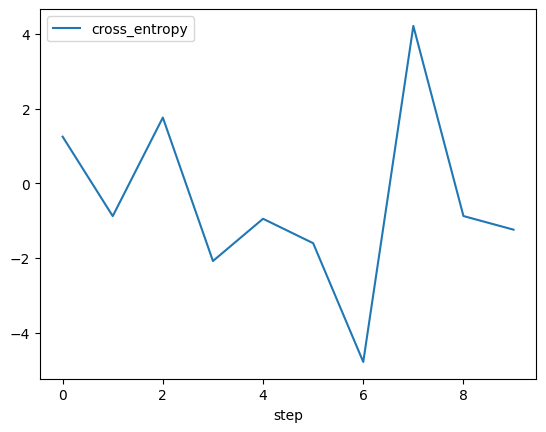

In [11]:
import pandas as pd

pd.DataFrame([
    {'cross_entropy': m.value, 'step': m.step} 
    for m in metric
]).plot.line('step', 'cross_entropy')

In [12]:
# Artifacts can be listed.
mlflow_client.list_artifacts(run_id=last_run.info.run_id)

[<FileInfo: file_size=45491, is_dir=False, path='MLFlow.ipynb'>]

In [13]:
# Artifacts can also be downloaded to the local filesystem.
# You can also use the MLflow web UI to access the artifacts.
mlflow_client.download_artifacts(run_id=last_run.info.run_id, path='MLFlow.ipynb')

'/app/mlflow/828221325841870602/f7639f92c4b74572979169e01ca0bc09/artifacts/MLFlow.ipynb'